# Phase 1: Core Implementation

## 1.1 setup and imports

In [1]:
import torch                      # core tensor functionalities
import torch.nn as nn             # neural network modules, includes layers andloss
import torch.optim as optim       # built-in optimizers
import matplotlib.pyplot as plt   # visualizatio module

### 1.1.1 setup random seed - reproducibility

random seed is required because it ensures that the result is repeatable. It makes sure that the data shuffling is consistent. Most importantly, it ensures that the same initial weights are used every time.

In [2]:
torch.manual_seed(42)

### 1.1.2 Check GPU availability

Since this is a very small scale application of linear regression, I am not using GPU in this particular application. However, for larger scale or maybe for a different algorithm, we will need to use GPU. As a result, it is a standard practice to check the GPU availability

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"System is using device as {device}")

System is using device as cpu


## 1.2 Data Generation

Why are we doing this?<br>
We are creating a sythetic dataset that contains linear relationship between `x` - independent variables and `y` - dependent variable.

### 1.2.1 Create input features

In [10]:
X = torch.rand(100, 1) * 10     # gives us 100 values. 1 column, ragning from 0 to 10

### 1.2.2 Define ground thuth function

In [13]:
y = 2*X + 3

### 1.2.3 Add noise

why?<br>
because in real world, ther will always be noise. the relationship is never perfect.

There will always be
1. measuring error
2. natural randomness
3. man-made error

So, the best practice will be to use the noise here

In [14]:
y = y + torch.rand(100,1)

### 1.2.4 Visualization of X and y

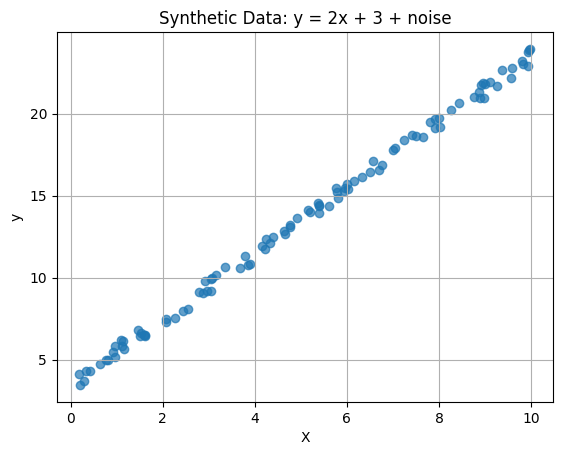

In [16]:
plt.scatter(X.numpy(), y.numpy(), alpha=0.7)
plt.title("Synthetic Data: y = 2x + 3 + noise")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

## 1.3 Model definition: creating learnable parameters

Working mechanism:<br>
`nn.Linear(1,1)` - creates `2` learnable parameters, namely:`weight` and `bias`<br>
`weight` - slope: how steep the line is<br>
`bias` - interception: where the line crosses `y axis`

`forward` - just says use this equation when you get an input.

In [21]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    # create a layer that creates 1 input and 1 output
    # internally it will learn weight 'w' and bias 'b' for y = wx+b
    self.linear = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear(x)

### 1.3.1 check initial weight and bias

```text
model
├── linear (nn.Linear)
│   ├── weight (Parameter)
│   └── bias   (Parameter)
```

In [27]:
model = LinearRegression()

print(f"Initial Weight:{model.linear.weight.item():.4f}")
print(f"Initial Bias:{model.linear.bias.item():.4f}")

Initial Weight:0.8981
Initial Bias:-0.3805


## 1.4 Loss functiona and Optimizer

What will we be doing?<br>
We are trying to set how the model learns.
1. Loss function: Measures how far the models predictions are from true values
2. Optimizer: adjusts the models weights and bias to minimize loss.


Loss function here is MSELoss() - because it is the most common for regression tasks

Optimizer is SGD here as it is one of the most easy and simple.

In [28]:
criterion = nn.MSELoss()                           # criterion(predictions, target) - loss

optimizer = optim.SGD(model.parameters(), lr=0.01) # model.parameters() -> access to weights and biases. after that the SGD optimizes the weights and biases.